# LSTM networks (Long Short-Term Memory networks)
LSTM networks (Long Short-Term Memory networks) are a type of neural network specifically designed to work with sequential data like time series. 

## How they work (simplified):
Think of an LSTM as having a memory cell with three gates:

- Forget gate: Decides what old information to discard
- Input gate: Decides what new information to store
- Output gate: Decides what to output based on current input and memory



py -3.11 -m venv lstm_env

my13\Scripts\activate

 python.exe -m pip install --upgrade pip

 
 pip install matplotlib scikit-learn  tensorflow  pandas

 


In [1]:
import struct; 
print(struct.calcsize('P') * 8)


64


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# read market.csv file 
data = pd.read_csv("market.csv.gz", parse_dates=['Date'],compression='gzip')
data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
5,1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
6,1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
7,1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
8,1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0
9,1928-01-13 00:00:00-05:00,17.580000,17.580000,17.580000,17.580000,0,0.0,0.0


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
Data shape: (24629, 1)
                               Close
Date                                
1927-12-30 00:00:00-05:00  17.660000
1928-01-03 00:00:00-05:00  17.760000
1928-01-04 00:00:00-05:00  17.719999
1928-01-05 00:00:00-05:00  17.549999
1928-01-06 00:00:00-05:00  17.660000
Training samples: 19655
Test samples: 4914


C:\new_works\datasciencecoursera\my13\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - loss: 7.9757e-05 - val_loss: 9.4367e-04
Epoch 2/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 120s 196ms/step - loss: 2.8850e-05 - val_loss: 2.4296e-04
Epoch 3/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 73s 118ms/step - loss: 2.8396e-05 - val_loss: 6.8157e-04
Epoch 4/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - loss: 2.6644e-05 - val_loss: 0.0036
Epoch 5/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - loss: 3.1630e-05 - val_loss: 9.8413e-04
Epoch 6/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 48s 79ms/step - loss: 2.5794e-05 - val_loss: 1.1551e-04
Epoch 7/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 78s 73ms/step - loss: 3.1131e-05 - val_loss: 1.3125e-04
Epoch 8/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - loss: 2.8000e-05 - val_loss: 5.5288e-04
Epoch 9/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - loss: 2.6931e-05 - val_loss: 3.0769e-04
Epoch 10/50
615/615 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - loss: 2.5705e-05 - val_loss: 2.8014e-04
Epoch 11/50
615/615 ━━━━━━━━━━━━━━━━━━━━

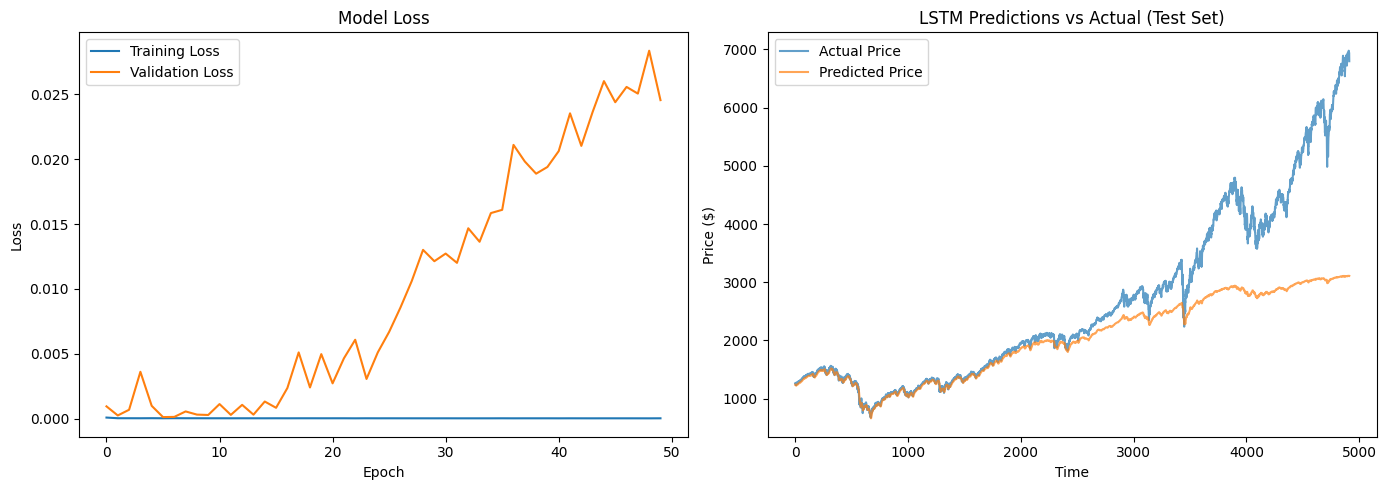

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

Predicted next day price: $3111.30
Current price: $6796.86


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Load your data
# data = pd.read_csv("market.csv.gz", parse_dates=['Date'], compression='gzip')

# Let's work with a single stock - adjust the column name as needed
# Assuming you have a 'Close' column or similar
print(data.columns)  # Check what columns you have

# Select the feature to predict (usually 'Close' price)
df = data[['Date', 'Close']].copy()  # Adjust 'Close' to your actual column name
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Remove any NaN values
df = df.dropna()

print(f"Data shape: {df.shape}")
print(df.head())

# ===== STEP 1: Prepare the data =====
# Scale the data to 0-1 range (LSTMs work better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# ===== STEP 2: Create sequences =====
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  # Past seq_length days
        y.append(data[i, 0])                # Next day's price
    return np.array(X), np.array(y)

# Use last 60 days to predict the next day
SEQ_LENGTH = 60

X, y = create_sequences(scaled_data, SEQ_LENGTH)

# ===== STEP 3: Split into train/test sets =====
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# ===== STEP 4: Build the LSTM model =====
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# ===== STEP 5: Train the model =====
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

# ===== STEP 6: Make predictions =====
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ===== STEP 7: Evaluate =====
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
test_mae = mean_absolute_error(y_test_actual, test_predict)

print(f"\nTrain RMSE: ${train_rmse:.2f}")
print(f"Test RMSE: ${test_rmse:.2f}")
print(f"Test MAE: ${test_mae:.2f}")

# ===== STEP 8: Visualize results =====
plt.figure(figsize=(14, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label='Actual Price', alpha=0.7)
plt.plot(test_predict, label='Predicted Price', alpha=0.7)
plt.title('LSTM Predictions vs Actual (Test Set)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()

plt.tight_layout()
plt.show()

# ===== STEP 9: Predict future =====
# Use the last SEQ_LENGTH days to predict tomorrow
last_sequence = scaled_data[-SEQ_LENGTH:]
last_sequence = last_sequence.reshape((1, SEQ_LENGTH, 1))

next_day_prediction_scaled = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(next_day_prediction_scaled)

print(f"\nPredicted next day price: ${next_day_prediction[0][0]:.2f}")
print(f"Current price: ${df.iloc[-1]['Close']:.2f}")

In [4]:
print("T1")


T1
